<a href="https://colab.research.google.com/github/Shubhamk05/python_projects/blob/main/Machine%20learning/card2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.naive_bayes  import GaussianNB
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21878 entries, 0 to 21877
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    21878 non-null  int64  
 1   V1      21878 non-null  float64
 2   V2      21878 non-null  float64
 3   V3      21878 non-null  float64
 4   V4      21878 non-null  float64
 5   V5      21878 non-null  float64
 6   V6      21878 non-null  float64
 7   V7      21878 non-null  float64
 8   V8      21878 non-null  float64
 9   V9      21878 non-null  float64
 10  V10     21878 non-null  float64
 11  V11     21878 non-null  float64
 12  V12     21878 non-null  float64
 13  V13     21878 non-null  float64
 14  V14     21878 non-null  float64
 15  V15     21878 non-null  float64
 16  V16     21878 non-null  float64
 17  V17     21878 non-null  float64
 18  V18     21878 non-null  float64
 19  V19     21878 non-null  float64
 20  V20     21878 non-null  float64
 21  V21     21878 non-null  float64
 22

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,...,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21877.000000,21877.000000
mean,16924.271551,-0.241060,0.222124,0.737915,0.262153,-0.175227,0.087496,-0.141011,0.019339,0.562079,...,-0.043038,-0.140156,-0.037826,0.010707,0.125683,0.029305,0.011978,0.006293,71.725300,0.003931
std,11005.409549,1.880901,1.518111,1.740947,1.451072,1.414872,1.322606,1.323924,1.383927,1.277273,...,0.849611,0.644914,0.512947,0.590807,0.436855,0.524399,0.395178,0.247253,205.034501,0.062576
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-3.612114,0.000000,0.000000
25%,5496.250000,-0.960913,-0.350012,0.298029,-0.649075,-0.756733,-0.660688,-0.597972,-0.169171,-0.273362,...,-0.257010,-0.564567,-0.175530,-0.331558,-0.136296,-0.339574,-0.067305,-0.010143,5.990000,0.000000
50%,18770.500000,-0.299205,0.206484,0.888730,0.222271,-0.210143,-0.176618,-0.069763,0.026032,0.515162,...,-0.109913,-0.111903,-0.048576,0.062115,0.163900,-0.042054,0.005402,0.019665,17.430000,0.000000
75%,27778.750000,1.164867,0.858497,1.520365,1.132694,0.332839,0.481047,0.447633,0.281472,1.330385,...,0.059938,0.267688,0.074156,0.399318,0.404503,0.320185,0.095819,0.077587,62.390000,0.000000
max,31907.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21872,31906,-0.476693,0.653508,1.021690,-0.033158,0.217430,-0.268752,0.732407,0.036116,0.037561,...,-0.186669,-0.465061,0.017674,-0.470226,-0.349215,0.169584,0.338304,0.212758,53.55,0.0
21873,31906,1.285161,-0.701455,0.221870,-0.744753,-0.674967,0.034267,-0.631373,0.097860,-0.835749,...,0.083025,0.190059,-0.074942,-0.278466,0.463615,-0.223877,0.011735,0.000997,39.75,0.0
21874,31906,-0.345979,1.094568,1.282208,0.068241,-0.016965,-0.989567,0.693958,-0.050855,-0.333856,...,-0.266852,-0.723026,-0.003364,0.322646,-0.173496,0.073145,0.241997,0.097610,5.99,0.0
21875,31907,1.171852,0.718042,-0.227521,1.373722,0.152349,-0.949840,0.271427,-0.153000,-0.184297,...,-0.013584,0.088759,-0.059148,0.278992,0.589886,-0.319374,0.055064,0.058347,1.00,0.0


In [ ]:
x = data.drop(['Class'], axis=1)
y = data['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
x_predict = model1.predict(x_train)
x_accuracy  = accuracy_score(x_predict, y_train)
x_accuracy

0.9965146840361102

In [ ]:
y_predict = model1.predict(x_train)
y_accuracy = accuracy_score(y_predict, y_train)
print(y_accuracy)
y_accuracy

0.9965146840361102


0.9965146840361102

In [ ]:
print(classification_report(y_predict, y_train))
print(confusion_matrix(y_predict, y_train))
print(accuracy_score(y_predict, y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17497
         1.0       0.08      1.00      0.14         5

    accuracy                           1.00     17502
   macro avg       0.54      1.00      0.57     17502
weighted avg       1.00      1.00      1.00     17502

[[17436    61]
 [    0     5]]
0.9965146840361102


<Axes: xlabel='Class', ylabel='count'>

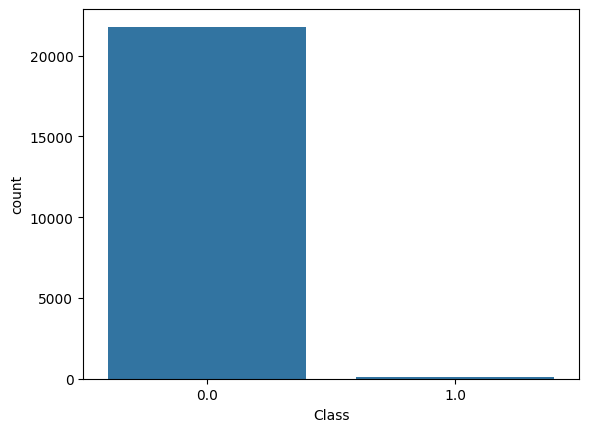

In [ ]:
sns.countplot(x='Class', data=data)

In [ ]:
model2 = GaussianNB()
model2.fit(x_train, y_train)

GaussianNB()

In [ ]:
x_predict = model2.predict(x_train)
x_accuracy  = accuracy_score(x_predict, y_train)
x_accuracy

0.9809164666895211

In [ ]:
y_predict = model1.predict(x_train)
y_accuracy = accuracy_score(y_predict, y_train)
print(y_accuracy)
y_accuracy

0.9965146840361102


0.9965146840361102

<Axes: xlabel='Class', ylabel='count'>

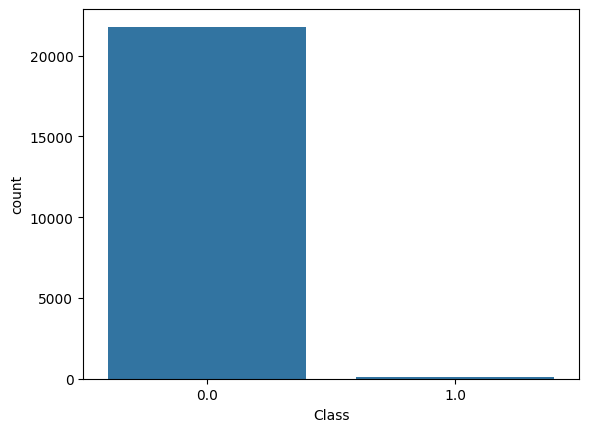

In [ ]:
sns.countplot(x='Class', data=data)

<Axes: >

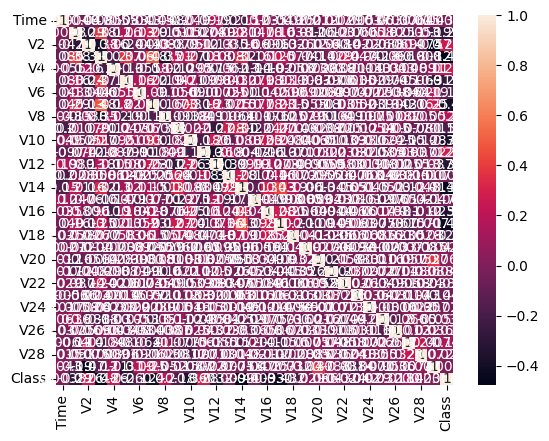

In [ ]:
sns.heatmap(data.corr(), annot=True)

<Axes: >

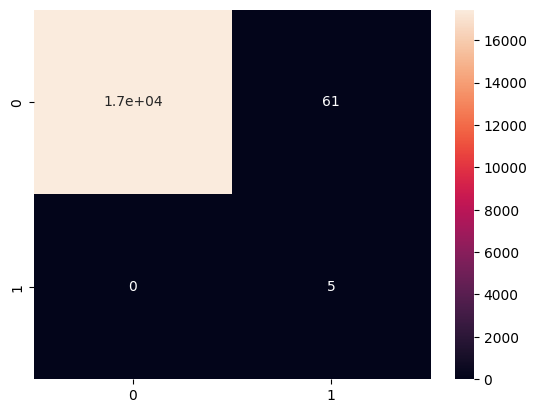

In [ ]:
sns.heatmap(confusion_matrix(y_predict, y_train), annot=True)